# Linear regression

## Libraries and settings

In [36]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_08


## Import the apartment data

In [37]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", 
                      sep=";", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print('rows: ', df.shape[0], ' columns: ', df.shape[1])
df.head(5)

rows:  722  columns:  17


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [38]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the simple linear regression model

In [39]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1272.94
Slope of regression line (beta):          13.548
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3678


### Plot regression line

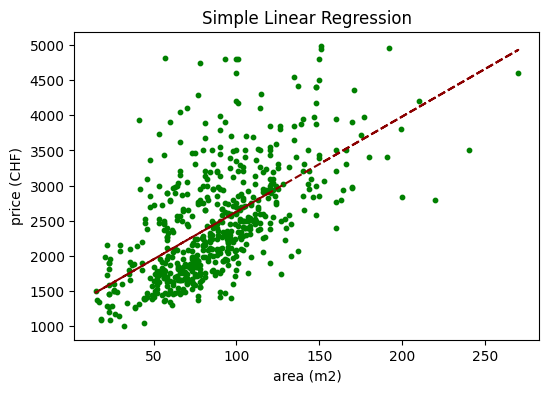

In [40]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [41]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2898.72
1st Observed price in dataset: 1441.00
1st Residual price in dataset: -1457.72


### Plot histogram of residuals

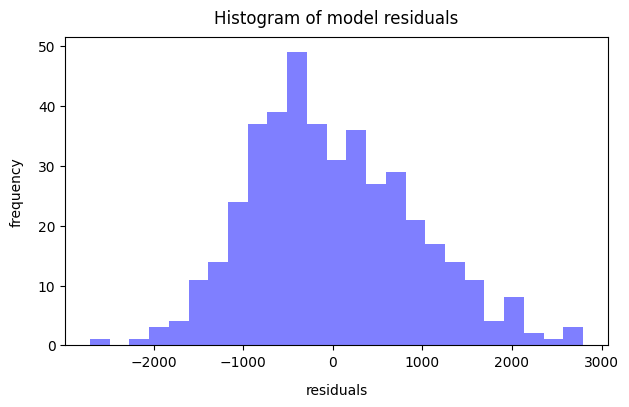

In [42]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [43]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print('Observed price: ', y_test.iloc[i].round(2), ' Predicted price: ', predicted.iloc[i].round(2))


Observed price:  1360  Predicted price:  2031.64
Observed price:  1640  Predicted price:  2004.54
Observed price:  1568  Predicted price:  2167.12
Observed price:  2290  Predicted price:  2207.76
Observed price:  4950  Predicted price:  2627.75
Observed price:  1787  Predicted price:  2248.41
Observed price:  3495  Predicted price:  2519.37
Observed price:  2450  Predicted price:  2031.64
Observed price:  3390  Predicted price:  2871.62
Observed price:  2836  Predicted price:  2573.56


## task 1b

Task 1b – Simple Linear Regression:
Intercept:  51.24
Slope:      -0.2265
R-squared:  0.3551
p-value:    0.0000


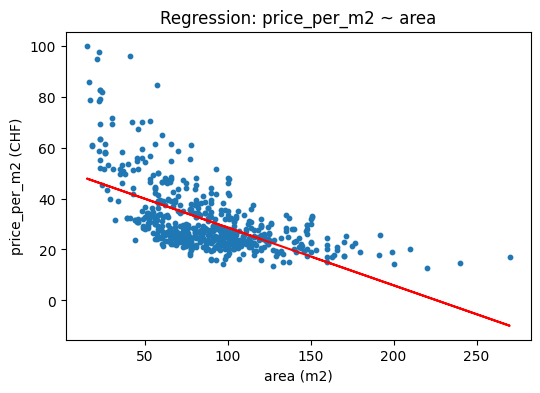

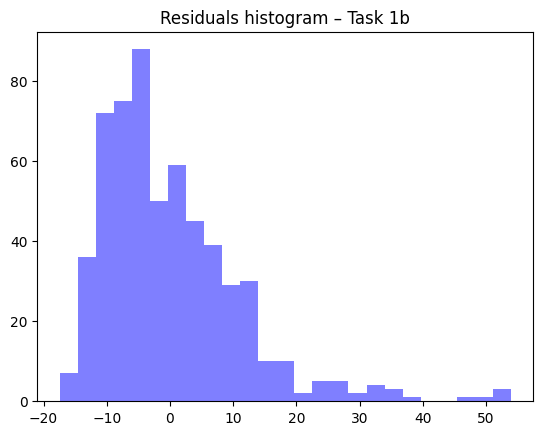

In [44]:
# --- Task 1b: Simple linear regression with price_per_m2 as target and area as predictor ---

# Create train & test sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    df['area'],
    df['price_per_m2'],
    test_size=0.20,
    random_state=42
)

# Fit regression
slope_b, intercept_b, r_b, p_b, std_err_b = stats.linregress(Xb_train, yb_train)

print("Task 1b – Simple Linear Regression:")
print(f"Intercept:  {intercept_b:.2f}")
print(f"Slope:      {slope_b:.4f}")
print(f"R-squared:  {r_b**2:.4f}")
print(f"p-value:    {p_b:.4f}")

# Plot regression line
def pred_b(x): return slope_b * x + intercept_b
preds_b = pred_b(Xb_train)

plt.figure(figsize=(6,4))
plt.scatter(Xb_train, yb_train, s=10)
plt.plot(Xb_train, preds_b, color="red")
plt.title("Regression: price_per_m2 ~ area")
plt.xlabel("area (m2)")
plt.ylabel("price_per_m2 (CHF)")
plt.show()

# Residuals
res_b = yb_train - preds_b

plt.hist(res_b, bins=25, color='blue', alpha=0.5)
plt.title("Residuals histogram – Task 1b")
plt.show()


### Interpretation Task 1b – Simple Linear Regression (price_per_m2 ~ area)

The slope is **negative (β = –0.2265)**, meaning that the price per m² decreases slightly as the living area increases.  
This effect is statistically significant (**p < 0.001**).

The **R² = 0.3551** indicates that **35.5%** of the variation in price_per_m2 can be explained by the area alone.  
Compared to the original model (price ~ area), this R² is **lower**, meaning that *area* is less able to explain *price_per_m2* than it explains *price*.

The histogram of residuals appears reasonably symmetrical with some deviations, indicating that the linear model is acceptable but not perfect.


## Task 1c

Task 1c – Simple Linear Regression:
Intercept:  52.96
Slope:      -6.2817
R-squared:  0.3116
p-value:    0.0000


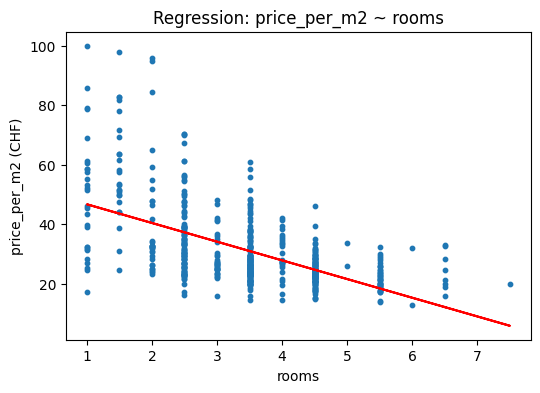

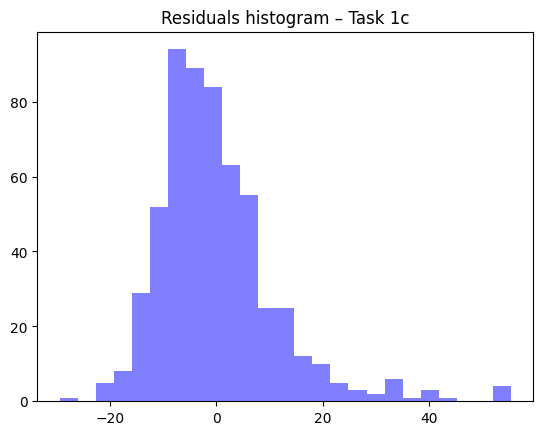

In [45]:
# --- Task 1c: Simple linear regression with price_per_m2 as target and rooms as predictor ---

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    df['rooms'],
    df['price_per_m2'],
    test_size=0.20,
    random_state=42
)

slope_c, intercept_c, r_c, p_c, std_err_c = stats.linregress(Xc_train, yc_train)

print("Task 1c – Simple Linear Regression:")
print(f"Intercept:  {intercept_c:.2f}")
print(f"Slope:      {slope_c:.4f}")
print(f"R-squared:  {r_c**2:.4f}")
print(f"p-value:    {p_c:.4f}")

def pred_c(x): return slope_c * x + intercept_c
preds_c = pred_c(Xc_train)

plt.figure(figsize=(6,4))
plt.scatter(Xc_train, yc_train, s=10)
plt.plot(Xc_train, preds_c, color="red")
plt.title("Regression: price_per_m2 ~ rooms")
plt.xlabel("rooms")
plt.ylabel("price_per_m2 (CHF)")
plt.show()

# Residuals
res_c = yc_train - preds_c

plt.hist(res_c, bins=25, color='blue', alpha=0.5)
plt.title("Residuals histogram – Task 1c")
plt.show()


### Interpretation Task 1c – Simple Linear Regression (price_per_m2 ~ rooms)

The slope is **negative (β = –6.28)**, meaning that apartments with more rooms tend to have a lower price per m².  
This effect is statistically significant (**p < 0.001**).

The **R² = 0.3116** shows that **31.2%** of the variation in price_per_m2 is explained by the number of rooms.  
This is **lower than in Task 1b** and significantly lower than the reference model price ~ area, indicating that *rooms* has even less explanatory power.

The residuals show a wider spread compared to Task 1b, and the distribution is not perfectly normal.  
This suggests that the linear model fits worse for rooms than for area.


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Task 1d: Multiple regression with additional variables 

In [46]:

X3 = df[['area', 'pop_dens', 'mean_taxable_income', 'dist_supermarket']]
y3 = df['price']

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.20, random_state=42
)

X3_train_const = sm.add_constant(X3_train)
model3 = sm.OLS(y3_train, X3_train_const).fit()

print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          6.98e-116
Time:                        22:33:21   Log-Likelihood:                -4403.2
No. Observations:                 577   AIC:                             8816.
Df Residuals:                     572   BIC:                             8838.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -386.2135    

### Interpretation Task 1d – Multiple Linear Regression

The multiple regression model achieves an **R² = 0.611**, meaning that the variables  
**area**, **population density**, **mean taxable income**, and **distance to supermarket**  
together explain **61.1%** of the variation in rental prices.  
This is a substantial improvement compared to the simple regression models in Tasks 1b and 1c.

**Significant predictors (p < 0.05):**
- **area** (β = 17.57): Larger apartments have higher prices.
- **pop_dens** (β = 0.2305): Apartments in densely populated areas are more expensive.
- **mean_taxable_income** (β = 0.0094): Wealthier municipalities have higher rents.

**Not significant:**
- **dist_supermarket** (p = 0.514 → NOT significant):  
  Distance to the nearest supermarket has **no meaningful effect** on rental prices.

This indicates that socio-economic variables and apartment size are important drivers of rental prices,  
while supermarket proximity does not substantially contribute to the model.


### Create train and test samples (train = 80%, test = 20% of the data)

In [47]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens
503   120   165.018625
6      65   525.662252
400    90   424.146342
644    63  1044.628957
484    91   399.525129 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [48]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     409.2
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          3.50e-111
Time:                        22:33:21   Log-Likelihood:                -4420.2
No. Observations:                 577   AIC:                             8846.
Df Residuals:                     574   BIC:                             8860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.1861     78.086      4.241      0.0

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

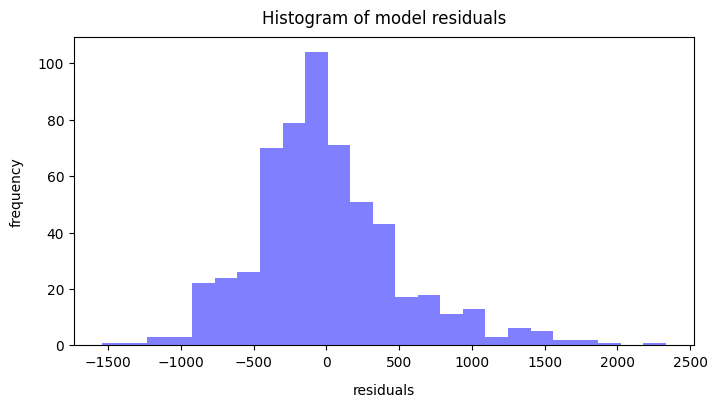

In [49]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed prices with the predicted prices

In [50]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 1730.3
Observed price: 1640.0, Predicted price: 1600.6
Observed price: 1568.0, Predicted price: 1806.3
Observed price: 2290.0, Predicted price: 2704.6
Observed price: 4950.0, Predicted price: 2519.3
Observed price: 1787.0, Predicted price: 2201.5
Observed price: 3495.0, Predicted price: 3116.8
Observed price: 2450.0, Predicted price: 2471.6
Observed price: 3390.0, Predicted price: 2685.2
Observed price: 2836.0, Predicted price: 2405.3


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [51]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-12-02 22:33:21
Python Version: 3.11.14
-----------------------------------
